In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

In [22]:
data = data = {
    'email': [
        "Compre agora a oferta grátis",  # SPAM
        "Clique aqui para ganhar prêmio",  # SPAM
        "Reunião agendada para segunda",  # NÃO SPAM
        "Oferta exclusiva para você",  # SPAM
        "Vamos almoçar amanhã?",  # NÃO SPAM
        "Grátis: sua consulta médica",  # SPAM
        "Confirme sua inscrição no evento",  # NÃO SPAM
        "Grátis, clique aqui para baixar",  # SPAM
        "Atualização importante do projeto",  # NÃO SPAM
        "Oferta limitada, clique e ganhe",  # SPAM
        "Parabéns, você foi selecionado",  # SPAM
        "Relatório final enviado",  # NÃO SPAM
        "Sua fatura vence hoje",  # NÃO SPAM
        "Ganhe dinheiro rápido e fácil",  # SPAM
        "Aceite nossa oferta especial",  # SPAM
        "Vamos discutir aquele contrato?",  # NÃO SPAM
        "Última chance de participar",  # SPAM
        "A reunião foi adiada para terça",  # NÃO SPAM
        "Inscreva-se agora e ganhe bônus",  # SPAM
        "Confirmação de pagamento recebida",  # NÃO SPAM
        "Presente grátis para você",  # SPAM
        "Desconto exclusivo, compre agora",  # SPAM
        "Proposta de parceria",  # NÃO SPAM
        "Seu pedido foi enviado",  # NÃO SPAM
        "Ganhe prêmios ao clicar aqui",  # SPAM
        "Agende sua consulta",  # NÃO SPAM
    ],
    'label': [
        'spam', 'spam', 'não spam', 'spam', 'não spam',
        'spam', 'não spam', 'spam', 'não spam', 'spam',
        'spam', 'não spam', 'não spam', 'spam', 'spam',
        'não spam', 'spam', 'não spam', 'spam', 'não spam',
        'spam', 'spam', 'não spam', 'não spam', 'spam',
        'não spam',
    ]
}


In [23]:
data = pd.DataFrame(data)
data.sort_values(by='label')

,email,label
12,Sua fatura vence hoje,não spam
23,Seu pedido foi enviado,não spam
22,Proposta de parceria,não spam
19,Confirmação de pagamento recebida,não spam
17,A reunião foi adiada para terça,não spam
15,Vamos discutir aquele contrato?,não spam
11,Relatório final enviado,não spam
8,Atualização importante do projeto,não spam
25,Agende sua consulta,não spam
4,Vamos almoçar amanhã?,não spam


In [24]:
data['label'].value_counts()

label
spam        14
não spam    12
Name: count, dtype: int64

[]

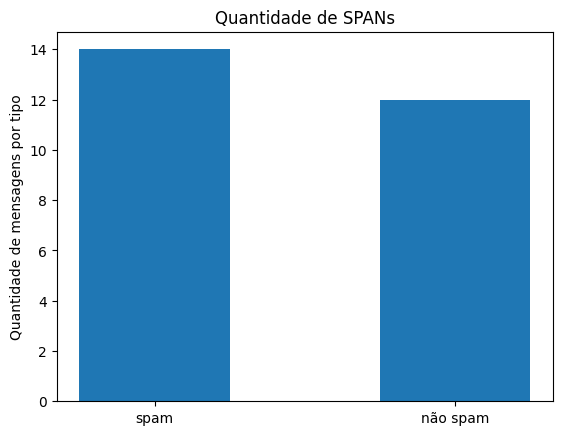

In [25]:
fig, ax = plt.subplots()

ax.bar(
    data['label'].value_counts().index,
    data['label'].value_counts(),
    width=.5
)

ax.set_ylabel('Quantidade de mensagens por tipo')
ax.set_title('Quantidade de SPANs')

plt.plot()

In [26]:
# vetorizar os
X = data['email']
y = data['label']

vetorizar = CountVectorizer()
X_vetorized = vetorizar.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_vetorized, y, test_size=.3, random_state=42)

In [27]:
# treinar
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)

MultinomialNB()

In [28]:
# fazer predição
y_pred = naive_bayes.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'A acurário é: ', accuracy)

A acurário é:  0.875


In [29]:
novo_email = ['Subi no ônibus']
novo_email_vetorizado = vetorizar.transform(novo_email)
previsao = naive_bayes.predict(novo_email_vetorizado)
previsao

array(['não spam'], dtype='<U8')

In [30]:
confusion_matrix(y_test, y_pred)

array([[2, 0],
       [1, 5]], dtype=int64)